In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import scipy.io
import matplotlib.pyplot as plt
import os
from scipy import signal
from scipy.fft import fft, fftshift

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

file_names=[]
for dirname, _, filenames in os.walk('/Users/aman/Github bs/datasets/EEG Data/'):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))
        #print(os.path.join(dirname, filename))
        
print(file_names)
# each trial is about 54 mins


['/Users/aman/Github bs/datasets/EEG Data/eeg_record7.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record6.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record4.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record5.mat', '/Users/aman/Github bs/datasets/EEG Data/.DS_Store', '/Users/aman/Github bs/datasets/EEG Data/eeg_record1.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record2.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record3.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record16.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record17.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record15.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record29.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record28.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record14.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record10.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record11.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record13

In [2]:
# build 5 order high pass filter
from scipy.signal import butter, lfilter, freqz   
# ----- ----- ----- -----    
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    x = signal.filtfilt(b, a, data)
    y = signal.filtfilt(b, a, x)
    return y


In [3]:
marker=128*60*10
#delete file #28 and 14 because it doesnot have enough data
useful_file_index = [3,4,5,6,7,10,11,12,13,17,18,19,20,21,24,25,26,27,31,32,33,34]
#useful_file_index = np.arange(1,35)
useful_channels=[4,5,8,9,10,11,16]
useful_channels_names=['F7','F3','P7','O1','O2','P8','AF4']
chan_num=7
trail_names=[]
data_focus={}
data_unfocus={}
data_drowsy={}
focus={}
unfocus={}
drowsy={}
#for i in useful_file_index:
i=1
for index,filename in enumerate(filenames):
    if int(filename.split('d')[1].split('.')[0]) in useful_file_index:
        mat = scipy.io.loadmat(file_names[index])
        trail_names.append(filename.split('.')[0])
        data_focus[trail_names[-1]]=mat['o']['data'][0,0][0:marker,useful_channels].copy()
        data_unfocus[trail_names[-1]]=mat['o']['data'][0,0][marker:2*marker,useful_channels].copy()
        data_drowsy[trail_names[-1]]=mat['o']['data'][0,0][2*marker:3*marker,useful_channels].copy()
        focus[trail_names[-1]]=mat['o']['data'][0,0][0:marker,useful_channels].copy()
        unfocus[trail_names[-1]]=mat['o']['data'][0,0][marker:2*marker,useful_channels].copy()
        drowsy[trail_names[-1]]=mat['o']['data'][0,0][2*marker:3*marker,useful_channels].copy()

In [5]:
type(data_focus['eeg_record3'])
print(data_focus['eeg_record3'].shape)

(76800, 7)


In [6]:
print(trail_names)

['eeg_record7', 'eeg_record6', 'eeg_record4', 'eeg_record5', 'eeg_record3', 'eeg_record17', 'eeg_record10', 'eeg_record11', 'eeg_record13', 'eeg_record12', 'eeg_record20', 'eeg_record34', 'eeg_record21', 'eeg_record19', 'eeg_record25', 'eeg_record31', 'eeg_record24', 'eeg_record18', 'eeg_record32', 'eeg_record26', 'eeg_record27', 'eeg_record33']


In [4]:
# High Pass 0.16HZ
row, col = data_focus['eeg_record3'].shape
for name in trail_names:
    for i in range(col):
        data_focus[name][:,i]=butter_highpass_filter(data_focus[name][:,i], 0.16, 128, 5)
        data_unfocus[name][:,i]=butter_highpass_filter(data_unfocus[name][:,i], 0.16, 128, 5)
        data_drowsy[name][:,i]=butter_highpass_filter(data_drowsy[name][:,i], 0.16, 128, 5)
        #print(name,data_drowsy[name][:,i].shape)

In [7]:
type(data_focus['eeg_record3'])
print(data_focus['eeg_record3'].shape)

(76800, 7)


In [5]:
feature_names = []
freq_range=np.arange(0.5,18.5,0.5)
symb='_'
#useful_channels_names=['F7','F3','P7','O1','O2','P8','AF4']
for index,channel in enumerate(useful_channels_names):
    for freq in freq_range:
        feature_names.append(channel+symb+str(freq))
feature_names

['F7_0.5',
 'F7_1.0',
 'F7_1.5',
 'F7_2.0',
 'F7_2.5',
 'F7_3.0',
 'F7_3.5',
 'F7_4.0',
 'F7_4.5',
 'F7_5.0',
 'F7_5.5',
 'F7_6.0',
 'F7_6.5',
 'F7_7.0',
 'F7_7.5',
 'F7_8.0',
 'F7_8.5',
 'F7_9.0',
 'F7_9.5',
 'F7_10.0',
 'F7_10.5',
 'F7_11.0',
 'F7_11.5',
 'F7_12.0',
 'F7_12.5',
 'F7_13.0',
 'F7_13.5',
 'F7_14.0',
 'F7_14.5',
 'F7_15.0',
 'F7_15.5',
 'F7_16.0',
 'F7_16.5',
 'F7_17.0',
 'F7_17.5',
 'F7_18.0',
 'F3_0.5',
 'F3_1.0',
 'F3_1.5',
 'F3_2.0',
 'F3_2.5',
 'F3_3.0',
 'F3_3.5',
 'F3_4.0',
 'F3_4.5',
 'F3_5.0',
 'F3_5.5',
 'F3_6.0',
 'F3_6.5',
 'F3_7.0',
 'F3_7.5',
 'F3_8.0',
 'F3_8.5',
 'F3_9.0',
 'F3_9.5',
 'F3_10.0',
 'F3_10.5',
 'F3_11.0',
 'F3_11.5',
 'F3_12.0',
 'F3_12.5',
 'F3_13.0',
 'F3_13.5',
 'F3_14.0',
 'F3_14.5',
 'F3_15.0',
 'F3_15.5',
 'F3_16.0',
 'F3_16.5',
 'F3_17.0',
 'F3_17.5',
 'F3_18.0',
 'P7_0.5',
 'P7_1.0',
 'P7_1.5',
 'P7_2.0',
 'P7_2.5',
 'P7_3.0',
 'P7_3.5',
 'P7_4.0',
 'P7_4.5',
 'P7_5.0',
 'P7_5.5',
 'P7_6.0',
 'P7_6.5',
 'P7_7.0',
 'P7_7.5',
 'P7_8.0'

In [6]:
# STFT was then calculated at a time step of 1 s producing a set of time-varying DFT 
# amplitudes X STFT (t,ω) at 1s intervals within each input EEG channel.
t_win = np.arange(0,128)
M = 128
window_blackman=0.42-0.5*np.cos((2*np.pi*t_win)/(M-1))+0.08*np.cos((4*np.pi*t_win)/(M-1)) #window_blackman = signal.windows.blackmanharris(128)

#col is 7
power_focus = {}
for name in trail_names:
    power_focus[name]=np.zeros([col,513,601])
    
power_unfocus = {}
for name in trail_names:
    power_unfocus[name]=np.zeros([col,513,601])
    
power_drowsy = {}
for name in trail_names:
    power_drowsy[name]=np.zeros([col,513,601])

#the output of the stft is 513*601,1 second data will produce 1 column of data,there are 601
for name in trail_names:
    for i in range(col):
        f, t,y1=scipy.signal.stft(data_focus[name][:,i],fs=128, window=window_blackman, nperseg=128, 
                      noverlap=0, nfft=1024, detrend=False,return_onesided=True, boundary='zeros',
                      padded=True)
        f, t,y2=scipy.signal.stft(data_unfocus[name][:,i],fs=128, window=window_blackman, nperseg=128, 
                      noverlap=0, nfft=1024, detrend=False,return_onesided=True, boundary='zeros',
                      padded=True)
        f, t,y3=scipy.signal.stft(data_drowsy[name][:,i],fs=128, window=window_blackman, nperseg=128, 
                      noverlap=0, nfft=1024, detrend=False,return_onesided=True, boundary='zeros',
                      padded=True)
        power_focus[name][i,:,:]=(np.abs(y1))**2
        power_unfocus[name][i,:,:]=(np.abs(y2))**2
        power_drowsy[name][i,:,:]=(np.abs(y3))**2



In [9]:
type(power_drowsy['eeg_record3'])
print(power_drowsy['eeg_record3'].shape)

(7, 513, 601)


In [7]:
# combine bins into 0.5HZ, and keep 0-18 HZ.

num=[]

power_focus_bin = {}
for name in trail_names:
    power_focus_bin[name]=np.zeros([7,36,601])
    
power_unfocus_bin = {}
for name in trail_names:
    power_unfocus_bin[name]=np.zeros([7,36,601])
    
power_drowsy_bin = {}
for name in trail_names:
    power_drowsy_bin[name]=np.zeros([7,36,601])

for name in trail_names:
    for chn in range(col):
        j=0
        for i in range(1,144,4):
            power_focus_bin[name][chn,j,:]=np.average(power_focus[name][chn,i:i+4,:],axis=0)
            power_unfocus_bin[name][chn,j,:]=np.average(power_unfocus[name][chn,i:i+4,:],axis=0)
            power_drowsy_bin[name][chn,j,:]=np.average(power_drowsy[name][chn,i:i+4,:],axis=0)
            #print(np.average(power_drowsy[name][chn,i:i+4,:],axis=0).shape)
            #if name=='eeg_record3':
            #    if chn==0:
            #        num.append((f[i:i+4]))
            #    print(j)
            j=j+1
            
#print(num)    
#print(len(num))

In [11]:
type(power_drowsy_bin['eeg_record3'])
print(power_drowsy_bin['eeg_record3'].shape)

(7, 36, 601)


In [8]:
# avarage over 15 seconds running window.

power_focus_ave = {}
for name in trail_names:
    power_focus_ave[name]=np.zeros([7,36,585])
    
power_unfocus_ave = {}
for name in trail_names:
    power_unfocus_ave[name]=np.zeros([7,36,585])
    
power_drowsy_ave = {}
for name in trail_names:
    power_drowsy_ave[name]=np.zeros([7,36,585])

for name in trail_names:
    for chn in range(col):
        j=0
        for k in range(0,585):
            power_focus_ave[name][chn,:,j]=np.average(power_focus_bin[name][chn,:,k:k+15],axis=1)
            power_unfocus_ave[name][chn,:,j]=np.average(power_unfocus_bin[name][chn,:,k:k+15],axis=1)
            power_drowsy_ave[name][chn,:,j]=np.average(power_drowsy_bin[name][chn,:,k:k+15],axis=1)
            #print(np.average(power_drowsy_bin[name][chn,:,k:k+15],axis=1).shape)
            j=j+1

In [13]:
type(power_drowsy_ave['eeg_record3'])
print(power_drowsy_ave['eeg_record3'].shape)

(7, 36, 585)


In [9]:
# Turn the data into a vector 
#[252,585]

svm_focus = {}
for name in trail_names:
    svm_focus[name]=np.zeros([252,585])
    
svm_unfocus = {}
for name in trail_names:
    svm_unfocus[name]=np.zeros([252,585])
    
svm_drowsy = {}
for name in trail_names:
    svm_drowsy[name]=np.zeros([252,585])

for name in trail_names:
    for j in range(585):      
        svm_focus[name][:,j]=power_focus_ave[name][:,:,j].reshape(1,-1)
        svm_unfocus[name][:,j]=power_unfocus_ave[name][:,:,j].reshape(1,-1)
        svm_drowsy[name][:,j]=power_drowsy_ave[name][:,:,j].reshape(1,-1)
    svm_focus[name]=10*np.log(svm_focus[name])
    svm_unfocus[name]=10*np.log(svm_unfocus[name])
    svm_drowsy[name]=10*np.log(svm_drowsy[name])
# now, we get the svm vector 252*585 252 rows


In [15]:
type(svm_focus['eeg_record3'])
print(svm_focus['eeg_record3'].shape)


(252, 585)


Using PCA first then SVC, labeling the data into 3 classes.

focused -- 2
unfocused -- 1
drowsy -- 0


In [10]:
#--------0
label_focus = [0]*585
#--------1
label_unfocus = [1]*585
#--------2
label_drowsy = [2]*585

#subject is the variable for all participants

subj1_files={'eeg_record3','eeg_record4','eeg_record5','eeg_record6','eeg_record7'}
subj2_files={'eeg_record10','eeg_record11','eeg_record12','eeg_record13'}
subj3_files={'eeg_record17','eeg_record18','eeg_record19','eeg_record20','eeg_record21'}
subj4_files={'eeg_record24','eeg_record25','eeg_record26','eeg_record27'}
subj5_files={'eeg_record31','eeg_record32','eeg_record33','eeg_record34'}


In [18]:
svm_focus['eeg_record10']

array([[38.77161708, 38.07711059, 34.24749235, ..., 31.98477085,
        30.62809224, 32.66528669],
       [40.74957912, 40.30613215, 38.04363382, ..., 30.1867528 ,
        28.66557901, 30.5413772 ],
       [40.5009797 , 40.18623662, 38.7811119 , ..., 27.3918812 ,
        25.79341617, 27.22435716],
       ...,
       [-4.86491015, -5.45160453, -3.32511895, ..., -1.88315727,
        -1.87277832, -1.94374841],
       [-6.4999323 , -6.94835025, -4.50868256, ..., -2.97233387,
        -3.12943228, -2.60578367],
       [-7.86382157, -8.18681765, -5.73174017, ..., -4.79683543,
        -4.82842869, -3.92715176]])

In [19]:
svm_focus['eeg_record10'][:,0].shape

(252,)

In [15]:
# I will try to use the data from all participants to train the model
target=[]
subj=np.array([]).reshape(252,0).copy()
for name in trail_names:
    subj=np.concatenate((subj,svm_focus[name]), axis=1)
    subj=np.concatenate((subj,svm_unfocus[name]), axis=1)
    subj=np.concatenate((subj,svm_drowsy[name]), axis=1)  
    target = target+label_focus+label_unfocus+label_drowsy
subj=subj.T
target = np.array(target)

In [21]:
subj.shape

(38610, 252)

In [22]:
target.shape

(38610,)

In [16]:
print('length of the target:',len(target))
print('the shape of the data from the subject1:', subj.shape)

length of the target: 38610
the shape of the data from the subject1: (38610, 252)


In [17]:
# This part I only train the data for subject1
target1=[]
subj1=np.array([]).reshape(252,0).copy()
for name in subj1_files:
    subj1=np.concatenate((subj1,svm_focus[name]), axis=1)
    subj1=np.concatenate((subj1,svm_unfocus[name]), axis=1)
    subj1=np.concatenate((subj1,svm_drowsy[name]), axis=1)  
    target1 = target1+label_focus+label_unfocus+label_drowsy
subj1=subj1.T
target1 = np.array(target1)

In [25]:
print(subj1.shape)
print(len(target1))

(8775, 252)
8775


In [26]:
print(target1)

[0 0 0 ... 2 2 2]


In [18]:
#for subject 2
target2=[]
subj2=np.array([]).reshape(252,0).copy()
for name in subj2_files:
    subj2=np.concatenate((subj2,svm_focus[name]), axis=1)
    subj2=np.concatenate((subj2,svm_unfocus[name]), axis=1)
    subj2=np.concatenate((subj2,svm_drowsy[name]), axis=1)  
    target2 = target2+label_focus+label_unfocus+label_drowsy
subj2=subj2.T
target2 = np.array(target2)

In [28]:
print(subj1)

[[ 9.4905778   6.8989672   2.59835576 ...  2.31935238  2.70979006
   2.11253323]
 [ 2.11911488 -2.13256858 -9.89548705 ...  0.70943661  1.38740116
   1.3142207 ]
 [ 2.3694009   0.77886151 -2.35730815 ...  0.67808155  1.00925219
   0.34870031]
 ...
 [66.12837769 61.87131253 53.68342474 ...  3.49356444  4.27066337
   4.19283498]
 [65.88055643 61.71158763 53.6715221  ...  3.59775338  4.1936812
   4.06053728]
 [66.28309463 62.19831409 54.37180357 ...  3.11569539  4.46898817
   5.11631909]]


In [ ]:
# Train the data from subject1
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC

data_train, data_test, data_train_target, data_test_target = train_test_split(subj1, target1, test_size=0.8, random_state=0)
scaler = preprocessing.StandardScaler().fit(data_train)
X_train_scaled = scaler.transform(data_train)
X_test_scaled = scaler.transform(data_test)

svc = SVC(kernel='rbf')
svc.fit(X_train_scaled,data_train_target)
print(f'The Score for Training data with SVM Model for subject1:',svc.score(X_train_scaled,data_train_target))
print(f'Score of For Test data with SVM Model for subject1 : {svc.score(X_test_scaled,data_test_target)}')

In [30]:
# Train the data from subject1
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC

data_train, data_test, data_train_target, data_test_target = train_test_split(subj, target, test_size=0.7, random_state=0)
scaler = preprocessing.StandardScaler().fit(data_train)
X_train_scaled = scaler.transform(data_train)
X_test_scaled = scaler.transform(data_test)

svc = SVC(kernel='rbf')
svc.fit(X_train_scaled,data_train_target)
print(f'The Score for Training data with SVM Model for subject1:',svc.score(X_train_scaled,data_train_target))
print(f'Score of For Test data with SVM Model for subject1 : {svc.score(X_test_scaled,data_test_target)}')

The Score for Training data with SVM Model for subject1: 0.9327462660795994
Score of For Test data with SVM Model for subject1 : 0.9058349058349059


In [31]:
#using subject 1 data
from sklearn.decomposition import PCA
data_train, data_test, data_train_target, data_test_target = train_test_split(subj1, target1, test_size=0.7, random_state=0)
scaler = preprocessing.StandardScaler().fit(data_train)
X_train_scaled = scaler.transform(data_train)
X_test_scaled = scaler.transform(data_test)

#PCA should be used on scaled data
pca = PCA()
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
var = pca.explained_variance_/pca.explained_variance_.sum()
var[0:20].sum()

0.9329683565553439

In [32]:
#using all data
from sklearn.decomposition import PCA
data_train, data_test, data_train_target, data_test_target = train_test_split(subj, target, test_size=0.7, random_state=0)
scaler = preprocessing.StandardScaler().fit(data_train)
X_train_scaled = scaler.transform(data_train)
X_test_scaled = scaler.transform(data_test)

#PCA should be used on scaled data
pca = PCA()
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
var = pca.explained_variance_/pca.explained_variance_.sum()
var[0:20].sum()

0.9324340867988502

In [33]:
import seaborn as sns
#sns.heatmap(pca.components_)
#print(sum(pca.components_[:,0]**2))

pca_map=pd.DataFrame(pca.components_,columns=feature_names,index=np.arange(1,253))
#pca.components_.shape
pca_map

,F7_0.5,F7_1.0,F7_1.5,F7_2.0,F7_2.5,F7_3.0,F7_3.5,F7_4.0,F7_4.5,F7_5.0,...,AF4_13.5,AF4_14.0,AF4_14.5,AF4_15.0,AF4_15.5,AF4_16.0,AF4_16.5,AF4_17.0,AF4_17.5,AF4_18.0
1,0.022816,0.023766,0.025675,0.029122,0.034951,0.040837,0.044614,0.048674,0.052720,0.056133,...,0.076070,0.071539,0.065134,0.058620,0.052929,0.047876,0.043528,0.040388,0.039157,0.039701
2,0.040783,0.041510,0.041762,0.040228,0.033235,0.021469,0.015346,0.008621,0.000313,-0.007368,...,-0.026773,-0.010833,0.009681,0.027572,0.037855,0.041952,0.042942,0.042671,0.041575,0.039375
3,0.116226,0.117410,0.118819,0.120041,0.118650,0.110947,0.108734,0.110740,0.113262,0.115509,...,-0.033493,-0.026927,-0.021924,-0.016793,-0.011050,-0.007083,-0.005920,-0.006001,-0.005659,-0.004060
4,0.008082,0.005178,-0.001397,-0.013880,-0.036144,-0.057653,-0.060295,-0.058996,-0.060054,-0.063940,...,0.084486,0.093112,0.099009,0.104706,0.112702,0.121357,0.128500,0.133634,0.135917,0.135191
5,0.142092,0.144317,0.146752,0.147362,0.141764,0.127473,0.116933,0.106320,0.095004,0.087405,...,0.029590,0.015831,0.000871,-0.013109,-0.024176,-0.029891,-0.031659,-0.033103,-0.035700,-0.038647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.011198,-0.023058,0.016615,-0.006056,0.001499,0.000643,-0.004458,0.009581,-0.015933,0.020045,...,0.018301,-0.012047,0.008568,-0.007277,0.007423,-0.007319,0.006262,-0.004365,0.002580,-0.001014
249,-0.007942,0.016551,-0.013135,0.007033,-0.003773,0.002433,-0.003808,0.008491,-0.014600,0.020045,...,0.031564,-0.018601,0.011433,-0.007217,0.004953,-0.003899,0.002721,-0.001538,0.001130,-0.000615
250,0.008005,-0.018051,0.014892,-0.006890,0.003564,-0.002985,0.003378,-0.006157,0.011490,-0.016456,...,-0.013207,0.009247,-0.006513,0.005442,-0.005561,0.005367,-0.003967,0.001596,0.000051,-0.000263
251,-0.003073,0.007604,-0.007018,0.003746,-0.002205,0.003179,-0.005943,0.010302,-0.015327,0.018337,...,0.006584,-0.005215,0.003028,0.000422,-0.003657,0.004403,-0.003080,0.001511,-0.000655,0.000165


In [34]:
#USE SVM linear model
svc = SVC(kernel='linear')
svc.fit(X_train_scaled,data_train_target)
print(f'The Score for Training data with SVM Linear Model for all subjects:',svc.score(X_train_scaled,data_train_target))
print(f'Score of For Test data with SVM Linear Model for all subjects : {svc.score(X_test_scaled,data_test_target)}')

The Score for Training data with SVM Linear Model for all subjects: 0.7420357420357421
Score of For Test data with SVM Linear Model for all subjects : 0.7152107152107152


In [35]:
#USE SVM linear model
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled,data_train_target)
print(f'The Score for Training data with SVM Linear Model for all subjects:',svc.score(X_train_scaled,data_train_target))
print(f'Score of For Test data with SVM Linear Model for all subjects : {svc.score(X_test_scaled,data_test_target)}')

The Score for Training data with SVM Linear Model for all subjects: 0.9327462660795994
Score of For Test data with SVM Linear Model for all subjects : 0.9058349058349059


In [36]:
#Try KNN Model
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train_scaled,data_train_target)
print("the score for training with data from 5 participants:",neighbor.score(X_train_scaled,data_train_target))
print("the score for test data from 5 participants:",neighbor.score(X_test_scaled,data_test_target))

the score for training with data from 5 participants: 0.9952516619183286
the score for test data from 5 participants: 0.9748399748399749


In [37]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=12)
dt.fit(X_train_scaled,data_train_target)
print(f"the score for training with data from 5 participants:{dt.score(X_train_scaled,data_train_target)}")
print("the score for test data from 5 participants:",dt.score(X_test_scaled,data_test_target))

the score for training with data from 5 participants:0.9151342484675818
the score for test data from 5 participants: 0.7853997853997854


In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []
for depth in range(1,35):
    dt_reg = RandomForestClassifier(max_depth=depth,random_state=0)
    dt_reg.fit(X_train_scaled,data_train_target)
    train_scores = train_scores +[dt_reg.score(X_train_scaled,data_train_target)]
    test_scores = test_scores + [dt_reg.score(X_test_scaled,data_test_target)]
    
x = list(range(1,35))
plt.plot(x,train_scores,c='r',label='train')
plt.plot(x,test_scores,c='b',label='test')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('Depth vs. Accuracy for Random Forest Classifier')
plt.show()

### After PCA


In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train_pca[:,0:30],data_train_target)
print(f'The Score for Training data with SVM RBF Model for all subjects:',svc.score(X_train_pca[:,0:30],data_train_target))
print(f'Score of For Test data with SVM RBF Model for all subjects : {svc.score(X_test_pca[:,0:30],data_test_target)}')

The Score for Training data with SVM RBF Model for all subjects: 0.8991625658292325
Score of For Test data with SVM RBF Model for all subjects : 0.8756798756798757


In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train_pca[:,0:30],data_train_target)
print(f'The Score for Training data with SVM RBF Model for all subjects:',svc.score(X_train_pca[:,0:30],data_train_target))
print(f'Score of For Test data with SVM RBF Model for all subjects : {svc.score(X_test_pca[:,0:30],data_test_target)}')

The Score for Training data with SVM RBF Model for all subjects: 0.6604506604506605
Score of For Test data with SVM RBF Model for all subjects : 0.6631146631146632


In [ ]:
#KNN after PCA
neighbor.fit(X_train_pca[:,0:30],data_train_target)
print("the score for training with data from 5 participants:",neighbor.score(X_train_pca[:,0:30],data_train_target))
print("the score for test data from 5 participants:",neighbor.score(X_test_pca[:,0:30],data_test_target))

the score for training with data from 5 participants: 0.991625658292325
the score for test data from 5 participants: 0.9633699633699634


### Validation

In [ ]:
# 5 fold validation
from sklearn.model_selection import KFold
import tensorflow as tf
tf.random.set_seed(0)
kfold = KFold(n_splits=5, shuffle=True)

data_train_target=data_train_target

fold_no = 1

score_tr=[]
score_cv=[]

svm = SVC(kernel='rbf')

for train,cv in kfold.split(X_train_scaled,data_train_target):
    X_tr = X_train_scaled[train]
    Y_tr = data_train_target[train]
    X_cv = X_train_scaled[cv]
    Y_cv = data_train_target[cv]
    
    tf.random.set_seed(0)
    
    svm.fit(X_tr,Y_tr)
    score_tr.append(svm.score(X_tr,Y_tr))
    score_cv.append(svm.score(X_cv,Y_cv))
    
    print(f'Score for {fold_no} Fold Training: {score_tr[-1]:.3f}')
    print(f'Score for {fold_no} Fold cv    : {score_cv[-1]:.3f}')
    print('----------------------------------')
    fold_no = fold_no + 1
    
print(f'Score of Average For Training: {np.mean(score_tr):.3f}')
print(f'Score of Average For CV.     : {np.mean(score_cv):.3f}')

Score for 1 Fold Training: 0.929
Score for 1 Fold cv    : 0.901
----------------------------------
Score for 2 Fold Training: 0.922
Score for 2 Fold cv    : 0.909
----------------------------------
Score for 3 Fold Training: 0.927
Score for 3 Fold cv    : 0.899
----------------------------------
Score for 4 Fold Training: 0.923
Score for 4 Fold cv    : 0.905
----------------------------------
Score for 5 Fold Training: 0.925
Score for 5 Fold cv    : 0.905
----------------------------------
Score of Average For Training: 0.925
Score of Average For CV.     : 0.903


## Recurrence plots


- 3 states, 22 records, 585 seconds = 38,610 images total
- 12,870 images each state

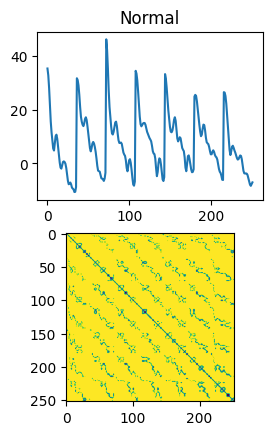

In [14]:
from __future__ import division, print_function
import numpy as np
import pylab as plt
from scipy.spatial.distance import pdist, squareform

def rec_plot(s, eps=0.10, steps=10):
    d = pdist(s[:,None])
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z

def moving_average(s, r=5):
    return np.convolve(s, np.ones((r,))/r, mode='valid')

if __name__ == "__main__":
    # Generate singal
    N = 200
    eps = 0.1
    steps = 10

    rn = svm_unfocus['eeg_record10'][:,100]
    plt.subplot(222)
    plt.plot(rn)
    plt.title("Normal")
    plt.subplot(224)
    plt.imshow(rec_plot(rn, eps=eps, steps=steps))
    plt.show()

In [ ]:
from __future__ import division, print_function
import numpy as np
import pylab as plt
from scipy.spatial.distance import pdist, squareform
import contextlib

def rec_plot(s, eps=0.10, steps=10):
    d = pdist(s[:,None])
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z

def moving_average(s, r=5):
    return np.convolve(s, np.ones((r,))/r, mode='valid')

if __name__ == "__main__":
    # Generate singal
    N = 200
    eps = 0.1
    steps = 10
    for name in trail_names:
        for sec in range(585):
            rn = svm_drowsy[name][:,sec]
            plt.figure(figsize=(3,3), dpi=200)
            plt.imshow(rec_plot(rn, eps=eps, steps=steps))
            plt.savefig("dataset/drowsy/"+name+"_plot"+str(sec)+".png")

## GAF

In [24]:
from fastai.vision import *
import numpy as np
import matplotlib.pyplot as plt
#from pyts.image import GASF, GADF
import pandas as pd
# Math
import math
import numpy as np
from datetime import datetime, timedelta
import scipy

In [25]:
#parameters
bs = 64
n_classes = 3
n_samples = 28


In [26]:
# Tools
def tabulate(x, y, f):
    """Return a table of f(x, y). Useful for the Gram-like operations."""
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))
def cos_sum(a, b):
    """To work with tabulate."""
    return(math.cos(a+b))

class GAF:

    def __init__(self):
        pass
    def __call__(self, serie):
        """Compute the Gramian Angular Field of an image"""
        # Min-Max scaling
        min_ = np.amin(serie)
        max_ = np.amax(serie)
        scaled_serie = (2*serie - max_ - min_)/(max_ - min_)

        # Floating point inaccuracy!
        scaled_serie = np.where(scaled_serie >= 1., 1., scaled_serie)
        scaled_serie = np.where(scaled_serie <= -1., -1., scaled_serie)

        # Polar encoding
        phi = np.arccos(scaled_serie)
        # Note! The computation of r is not necessary
        r = np.linspace(0, 1, len(scaled_serie))

        # GAF Computation (every term of the matrix)
        gaf = tabulate(phi, phi, cos_sum)

        return(gaf, phi, r, scaled_serie)

In [27]:

# Toy dataset
X = svm_unfocus[name][:,100]
gaf = GAF()
g, _,_,_ = gaf(X)
print(g.shape)

(252, 252)


Text(0.5, 1.0, 'GAF')

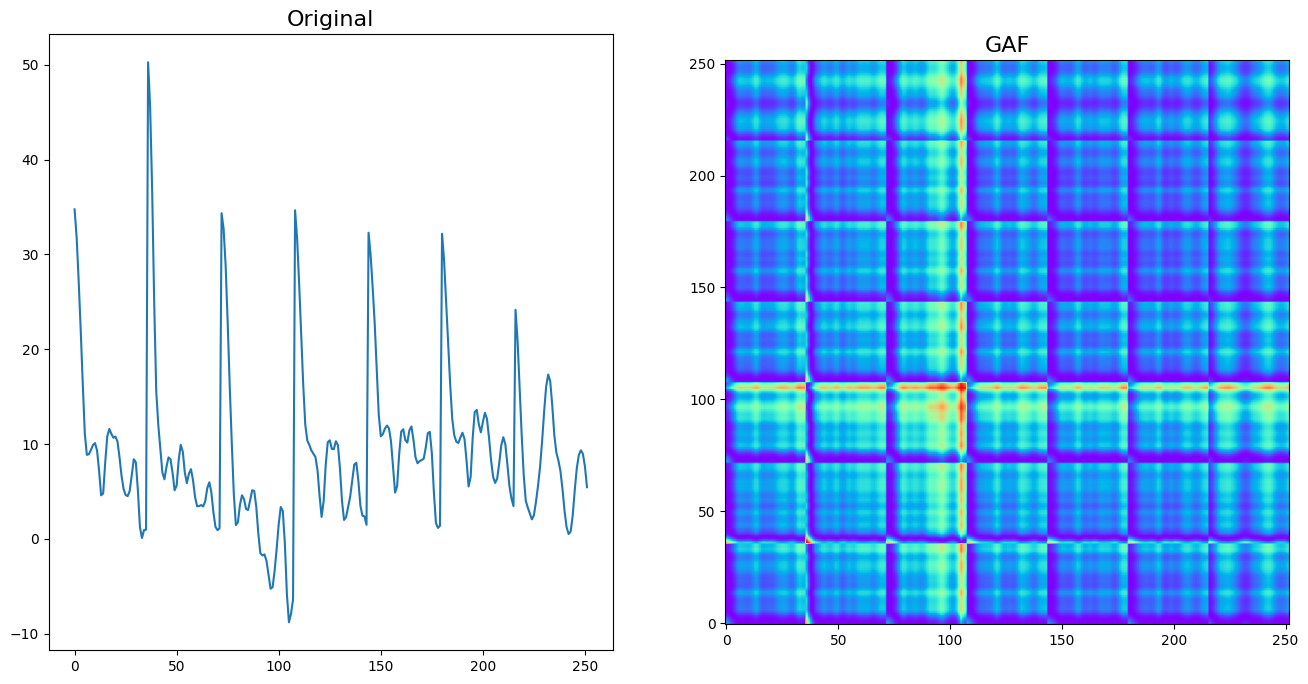

In [28]:
# Show the results for the first time series
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.plot(X)
plt.title("Original", fontsize=16)
plt.subplot(122)
plt.imshow(g, cmap='rainbow', origin='lower')
plt.title("GAF", fontsize=16)

In [ ]:
if __name__ == "__main__":
    # Generate singal
    N = 200
    eps = 0.1
    steps = 10
    for name in trail_names:
        print(name)
        for sec in range(585):
            X = svm_drowsy[name][:,sec]
            gaf = GAF()
            g, _,_,_ = gaf(X)
            
            plt.figure(figsize=(3,3),dpi=200)
            plt.imshow(g, cmap='rainbow', origin='lower')
            plt.savefig("dataset_gam/drowsy/"+name+"_plot"+str(sec)+".png")

['eeg_record7', 'eeg_record6', 'eeg_record4', 'eeg_record5', 'eeg_record3', 'eeg_record17', 'eeg_record10', 'eeg_record11', 'eeg_record13', 'eeg_record12', 'eeg_record20', 'eeg_record34', 'eeg_record21', 'eeg_record19', 'eeg_record25', 'eeg_record31', 'eeg_record24', 'eeg_record18', 'eeg_record32', 'eeg_record26', 'eeg_record27', 'eeg_record33']


## MTF

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyts/preprocessing/discretizer.py:168: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0]. Consider decreasing the number of bins or removing these samples.
  warn("Some quantiles are equal. The number of bins will "


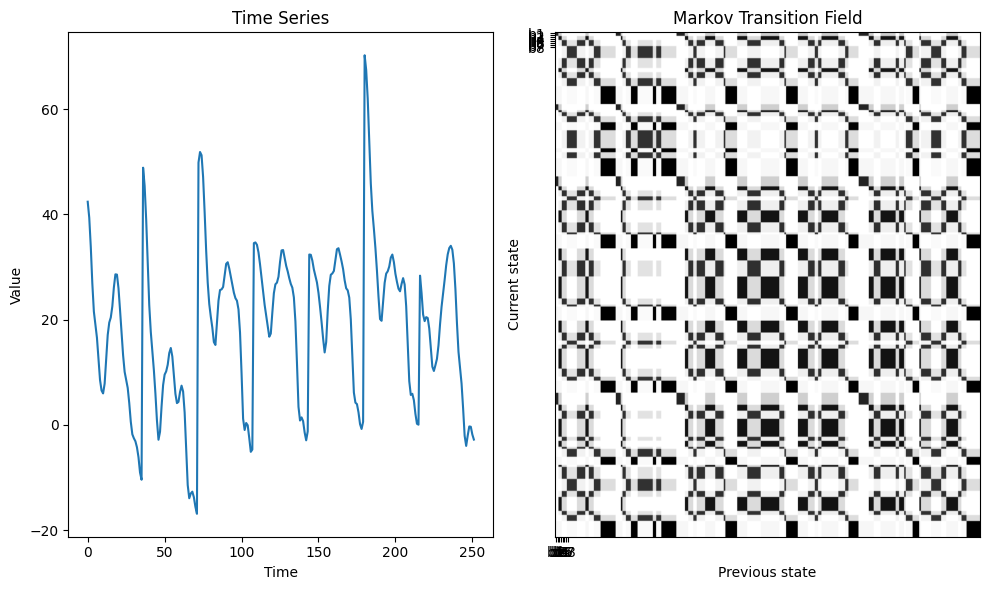

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


def plot_mtf_with_timeseries(time_series, n_bins=8):

    # Discretize the time series into n_bins
    discretized_ts = np.digitize(time_series, np.linspace(min(time_series), max(time_series), n_bins+1)) - 1

    # Compute the Markov Transition Field
    mtf = MarkovTransitionField(n_bins=n_bins)
    mtf_data = mtf.fit_transform(np.array([discretized_ts]))

    # Create figure and subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

    # Plot time series
    axs[0].plot(time_series)
    axs[0].set_title("Time Series")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Value")

    # Plot MTF
    axs[1].imshow(mtf_data[0], cmap="Greys", aspect="auto")
    axs[1].set_title("Markov Transition Field")
    axs[1].set_xlabel("Previous state")
    axs[1].set_ylabel("Current state")
    axs[1].set_xticks(np.arange(n_bins))
    axs[1].set_yticks(np.arange(n_bins))
    axs[1].set_xticklabels([f"b{i+1}" for i in range(n_bins)])
    axs[1].set_yticklabels([f"b{i+1}" for i in range(n_bins)])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage
time_series = svm_drowsy[name][:,100]
plot_mtf_with_timeseries(time_series)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


def plot_mtf_with_timeseries(time_series, n_bins=8):

    # Discretize the time series into n_bins
    discretized_ts = np.digitize(time_series, np.linspace(min(time_series), max(time_series), n_bins+1)) - 1

    # Compute the Markov Transition Field
    mtf = MarkovTransitionField(n_bins=n_bins)
    mtf_data = mtf.fit_transform(np.array([discretized_ts]))

    plt.figure(figsize=(3,3),dpi=200)
    plt.imshow(mtf_data[0], cmap="Greys", aspect="auto")
    plt.savefig("dataset_mtf/unfocus/"+name+"_plot"+str(sec)+".png")

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for name in trail_names:
        print(name)
        for sec in range(585):
            time_series = svm_unfocus[name][:,sec]
            plot_mtf_with_timeseries(time_series)
